### Netflix data analysis

#### In this exercise, we are goining to use the skills we learnt in panads to analyse real data. This exercise is similar to real world data analysis tasks used as one of the main steps in data science projects

Netflix recently released some user ratings data. I wanted to ask a straightforward question: do Netflix subscribers prefer older or newer movies?

Intuitively, you want to split the dataset into groups, one for each year, and then to compute a summary statistic, such as the mean or the median, and then to see whether this statistic increases over the years (after this, you may want to perform a statistical test).

* ** Data Exploration with pandas**

In [3]:
# Import data and check out head of DataFrame
netflix_df = pd.read_csv('../Data/netflix.csv')
netflix_df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


* **Summarising your data with plots and statistics**

In [5]:
# Check out info of DataFrame
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


* **Clean the data by dropping any NaN or duplicates**

In [6]:
# Drop rows with missing values and drop duplicate
netflix_df.dropna(inplace=True)
netflix_df.drop_duplicates(inplace=True)

* **build a pairplot of the DataFrame using seaborn in order to get a visual sense of the data. You'll color the data by the 'rating' column. Check out the plots and see what information you can get from them**



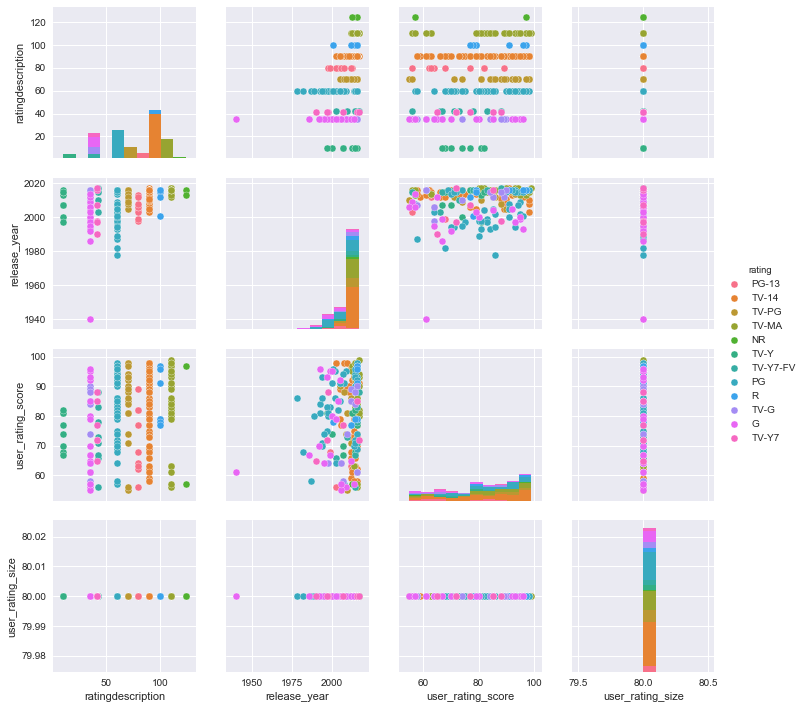

In [7]:
# Visualize pairplot of df
sns.pairplot(netflix_df, hue='rating');

* **There is not a visually identifiable trend but perhaps some data analysis will draw out any trends. Check out several summary statistics of the DataFrame**

In [9]:
netflix_df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


* **split the data into groups, where each group is the set of movies released in a given year**

In [10]:
# Group by year
df_by_year = netflix_df.groupby('release_year')

* **Remember that the .describe() method for a DataFrame returns summary statistics for numeric columns? Well, the .describe() method for DataFrameGroupBy objects returns summary statistics for each numeric column, but computed for each group in the split.**

In [12]:
# Summary stats over years
df_by_year.describe().head()

ratingdescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release_year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user_rating_score        ...              user_rating_size        \
                         count  mean  ...    75%   max            count  mean   
release_year                          ...                                       
1940                       1.0  61.0  ...   61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...   86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...   68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...   67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...   58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release_year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

* **Let's say that you wanted the mean or median user_rating_score for each year. Then you can apply the .mean() or .median() method, respectively, to the groupby object and 'combine' these into a new DataFrame.**

In [13]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingdescription,user_rating_score,user_rating_size
release_year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


* **You're interested in the user_rating_score column, which contains the median rating for each year. You can slice out the user_rating_score column of df_med_by_year and plot it as a function of the year (given by the index of the DataFrame df_rat_by_year):**

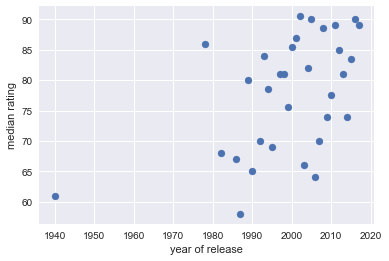

In [14]:
# Slice out user rating and plot
df_rat_by_year = df_med_by_year['user_rating_score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');
